# Basic workflow

In [1]:
from pykanto.utils.paths import pykanto_data
from pykanto.utils.read import open_dataset
from pykanto.dataset import KantoData
from pykanto.parameters import Parameters

We are going to load one of the very small sample datasets that are packaged with `pykanto`—this will be enough for a first test to familiarise yourself with the package. See [working with paths and directories](./contents/3_project-structure.md) to learn how to load your own data.

This particular dataset consists of a few songs from two male great tits (_Parus major_) in [my study population](http://wythamtits.com/), Wytham Woods, Oxfordshire, UK.

In [2]:
DATASET_ID = "GREAT_TIT"
DIRS = pykanto_data(dataset=DATASET_ID)
print(DIRS)



Items held:

PROJECT: /home/nilomr/projects/pykanto/pykanto
DATA: /home/nilomr/projects/pykanto/pykanto/data
RAW_DATA: /home/nilomr/projects/pykanto/pykanto/data/segmented/great_tit
SEGMENTED: /home/nilomr/projects/pykanto/pykanto/data/segmented/great_tit
RESOURCES: /home/nilomr/projects/pykanto/pykanto/resources
REPORTS: /home/nilomr/projects/pykanto/pykanto/reports
FIGURES: /home/nilomr/projects/pykanto/pykanto/reports/figures


Now we can create a `KantoData` object, which is the main class in `pykanto` and acts as a sort of database.

In [3]:
params = Parameters() # Using default parameters for simplicity, which you should't!
dataset = KantoData(DATASET_ID, DIRS, parameters=params, overwrite_dataset=True)
dataset.vocs.head(3)

Loading JSON files:   0%|          | 0/20 [00:00<?, ?it/s]

Done


,species,ID,label,recorder,recordist,source_datetime,datetime,date,time,timezone,...,length_s,lower_freq,upper_freq,max_amplitude,min_amplitude,bit_depth,tech_comment,source_wav,wav_file,spectrogram_loc
2021-B32-0415_05-11,Great tit,B32,VOCALISATION,24F319055FDF2205,Nilo Merino Recalde,2021-04-15 05:00:00,2021-04-15 05:07:22.866667,2021-04-15,05:07:22.866667,UTC,...,1.139250,2506,5922,0.673711,-0.666701,16,Recorded at 05:00:00 15/04/2021 (UTC) by Audio...,/home/nilomr/projects/great-tit-song/data/raw/...,/home/nilomr/projects/pykanto/pykanto/data/seg...,/home/nilomr/projects/pykanto/pykanto/data/dat...
2021-B32-0415_05-15,Great tit,B32,VOCALISATION,24F319055FDF2205,Nilo Merino Recalde,2021-04-15 05:00:00,2021-04-15 05:08:16.520000,2021-04-15,05:08:16.520000,UTC,...,1.194375,2392,5694,0.356706,-0.351275,16,Recorded at 05:00:00 15/04/2021 (UTC) by Audio...,/home/nilomr/projects/great-tit-song/data/raw/...,/home/nilomr/projects/pykanto/pykanto/data/seg...,/home/nilomr/projects/pykanto/pykanto/data/dat...
2021-B32-0415_05-21,Great tit,B32,VOCALISATION,24F319055FDF2205,Nilo Merino Recalde,2021-04-15 05:00:00,2021-04-15 05:09:27.600000,2021-04-15,05:09:27.600000,UTC,...,1.188250,2392,5739,0.189776,-0.188388,16,Recorded at 05:00:00 15/04/2021 (UTC) by Audio...,/home/nilomr/projects/great-tit-song/data/raw/...,/home/nilomr/projects/pykanto/pykanto/data/seg...,/home/nilomr/projects/pykanto/pykanto/data/dat...


We now have an object `dataset`, which is an instance of the `KantoData` class and has all of its methods. For example, you might want to segment your songs into discrete notes using `pykanto`'s algorithm, which is a simple amplitude-based method that works reasonably well (based on Tim Sainburg's [vocalseg](https://github.com/timsainb/vocalization-segmentation) and Robert Lachlan's de-echoing method in [Luscinia](https://rflachlan.github.io/Luscinia/)).

2022-05-02 23:31:43,663	INFO services.py:1338 -- View the Ray dashboard at http://127.0.0.1:8265


Finding units in vocalisations:   0%|          | 0/10 [00:00<?, ?it/s]

Found and segmented 169 units.


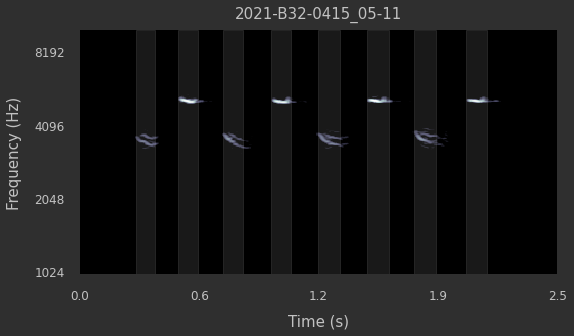

In [4]:
# Segment:
dataset.segment_into_units()

# Plot an example:
for vocalisation in dataset.vocs.index[:1]:
    dataset.plot_voc_seg(vocalisation)

Next, you can create spectrogram representations of the units or the average of the units present in the vocalisations of each individual ID in the dataset, project and cluster them, and prepare compressed representations that can be used with the interactive app:

In [5]:
dataset.get_units()
dataset.cluster_ids(min_sample=5)
dataset.prepare_interactive_data()

Calculating and saving unit spectrograms:   0%|          | 0/2 [00:00<?, ?it/s]

Found 2 individual IDs. They will be processed in 2 chunks of length 1.


Projecting and clustering vocalisations:   0%|          | 0/2 [00:00<?, ?it/s]

(_reduce_and_cluster_r pid=76534) UserWarning:
(_reduce_and_cluster_r pid=76534)     `min_cluster_size` too small, setting it to 2
(_reduce_and_cluster_r pid=76538) UserWarning:
(_reduce_and_cluster_r pid=76538)     `min_cluster_size` too small, setting it to 2


Initiate: Prepare interactive visualisation:   0%|          | 0/2 [00:00<?, ?it/s]

Prepare interactive visualisation:   0%|          | 0/2 [00:00<?, ?it/s]

Now you can start the interactive app on your browser by simply running `dataset.open_label_app()`.

There are not enough data in this minimal dataset to show how the app works - clustering doesn't work well with such small sample sizes. Here is a gif showing how it would look with real data from these birds:

![label app demo](../custom/labelapp.gif)

Once you are done checking the automatically assigned labels you can save the last version of the dataset by running `dataset.save_to_disk()`

Finally, to load an existing dataset:
(When using your own data you will first need to create a ProjDirs object, please see [how to work with paths and directories](./3_project-structure.md).

In [6]:
dataset_loc = DIRS.DATA / "datasets" / DATASET_ID / f"{DATASET_ID}.db"
dataset = open_dataset(dataset_loc)